## Условие 1: Задача 1
```
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы
```

### 1.1. Скачать следующие данные: kc-house-data

In [43]:
import pandas as pd

df = pd.read_csv('kc-house-data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2. Изучите стоимости недвижимости

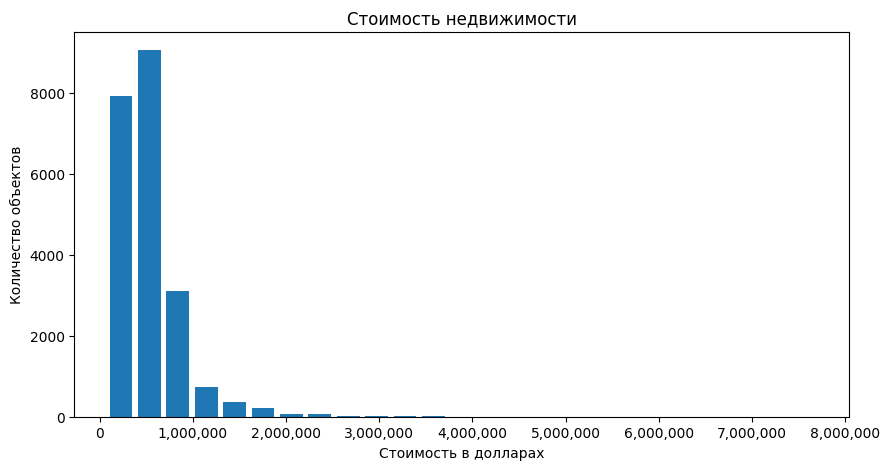

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x):,}'

formatter = FuncFormatter(thousands_formatter)

plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=25, rwidth=0.8)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость в долларах')
plt.ylabel('Количество объектов')

plt.gca().xaxis.set_major_formatter(formatter);


#### Вывод:
```
Большинство домов имеют стоимость до 1 млн. рублей. В райноне 1 млн. находится около 4 тысяч домов. Далее более дорогие дома ещё проявляются на графике стоимостью до 4 млн. рублей. И совсем единичные дома, которые на графике не видно, очень дорогие, стоимость от 4 до 8 млн. рублей.
```

### 1.3. Изучите распределение квадратуры жилой

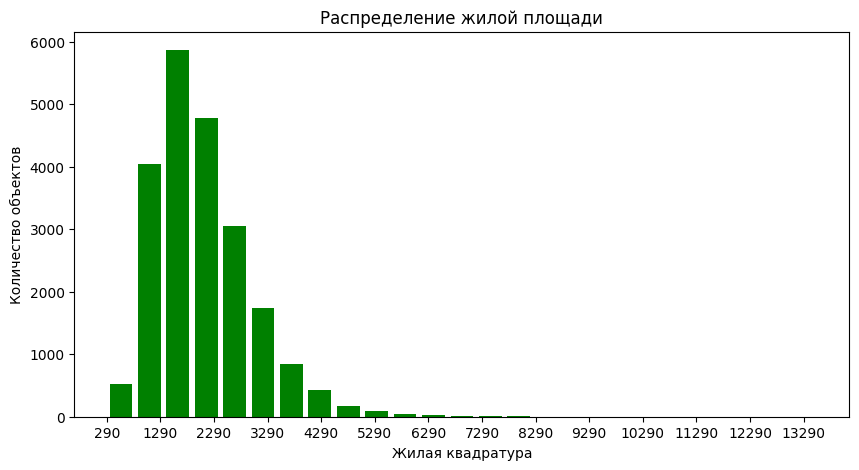

In [46]:
plt.figure(figsize=(10, 5))
plt.hist(df['sqft_living'], color='green', bins=25, rwidth=0.8)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая квадратура')
plt.ylabel('Количество объектов')
plt.xticks(range(min(df['sqft_living']), max(df['sqft_living']) + 1, 1000));

#### Вывод:
```
Большинство домов имеют жилую площадь от 1000 до 3000 кв.метров. Таких домов более 3000. Есть немного домов около 500 штук с небольшой площадью от 300 до 800 кв. метров. И совсем мало домов с большой площадью до 14 тысяч кв. метров.
```

### 1.4. Изучите распределение года постройки

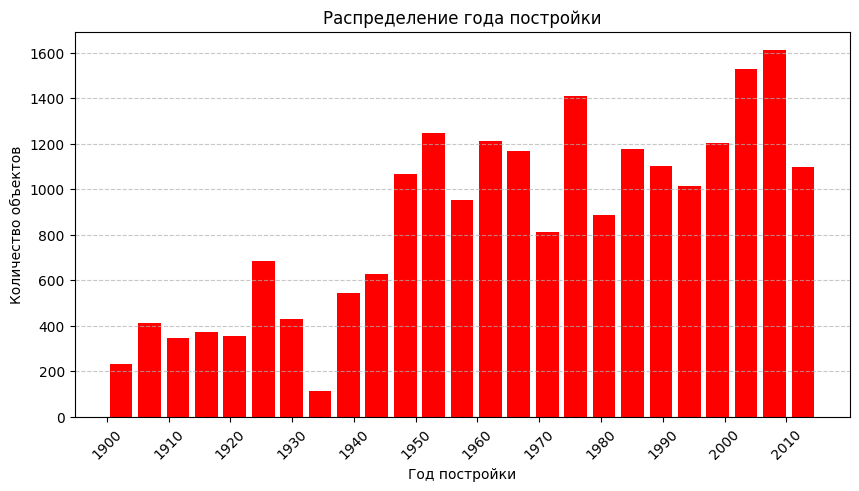

In [47]:
plt.figure(figsize=(10, 5))
plt.hist(df['yr_built'], color='red', bins=25, rwidth=0.8)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объектов')
plt.xticks(range(min(df['yr_built']), max(df['yr_built']) + 1, 10), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7);

#### Вывод:
```
Дома строились почти по нарастающей. До 1945 года всплеск построек был в середине 1920-х годов, а в конце 1930-х годов был резкий спад. Затем после 1945 года стало строиться гораздо больше домов, чем раньше, более 1000 штук. Возможно это связано с окончанием войны и необходимостью строить дома из-за разрушений. Были также небольшие падения и скачки в строительстве. Пик построек пришелся на 2010 год, когда было построено более 1600 домов.
```

## Условие 2: 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы

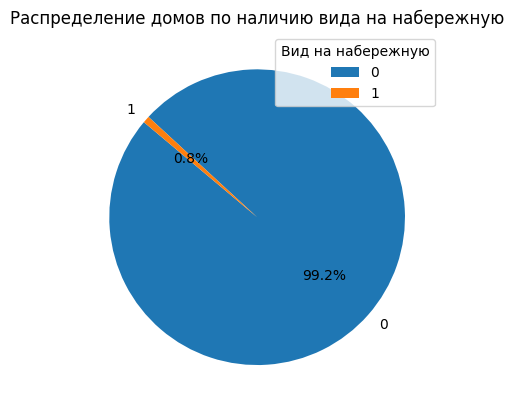

In [48]:
data = df['waterfront'].value_counts()
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names, startangle=140)
plt.title('Распределение домов по наличию вида на набережную')
plt.legend(names, title="Вид на набережную", loc="best");

#### Вывод:
```
С видом на набережную всего 0,8% домов, все остальные 99,2% домов вида на набережную не имеют.
```

### 2.2. Изучите распределение этажей домов

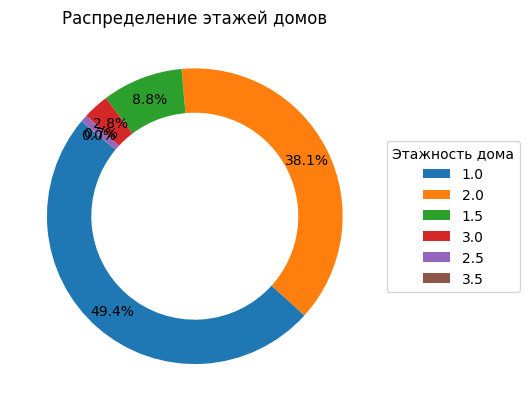

In [49]:
data = df['floors'].value_counts()
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=None, startangle=140, wedgeprops=dict(width=0.3), pctdistance=0.85)
plt.title('Распределение этажей домов')
plt.legend(names, title="Этажность дома", loc="center left", bbox_to_anchor=(1, 0.5));

#### Вывод:
```
Больше всего домов 49,4% - одноэтажных. Также значительное количество 38,1% - двухэтажных домов. Небольшая часть 8,8% домов с 1,5 этажами. Совсем мало, всего 2,8% - трёхэтажных домов. И есть единичные дома с 2,5 и 3,5 этажами.
```

### 2.3. Изучите распределение состояния домов

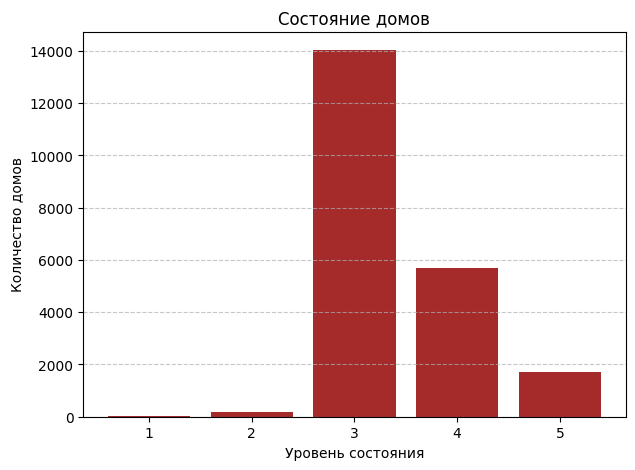

In [50]:
data = df['condition'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(7, 5))
plt.bar(names, values, color='brown')
plt.xticks(names)
plt.title('Состояние домов')
plt.xlabel('Уровень состояния')
plt.ylabel('Количество домов')
plt.grid(axis='y', linestyle='--', alpha=0.7);

#### Вывод:
```
Большинство домов (14000 штук) имеют среднее состоянии на уровне 3. Эти дома находятся в приемлемом состоянии и, возможно, требуют некоторого ремонта. Совсем единичное количество домов в плохом состоянии 1 или 2. В идеальном состоянии на уровне 5, не требующие существенных ремонтов, находится около 2000 домов. И в очень хорошем состоянии находится около 6000 домов.
```

## Условие 3: 3 задача

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [51]:
import seaborn as sns

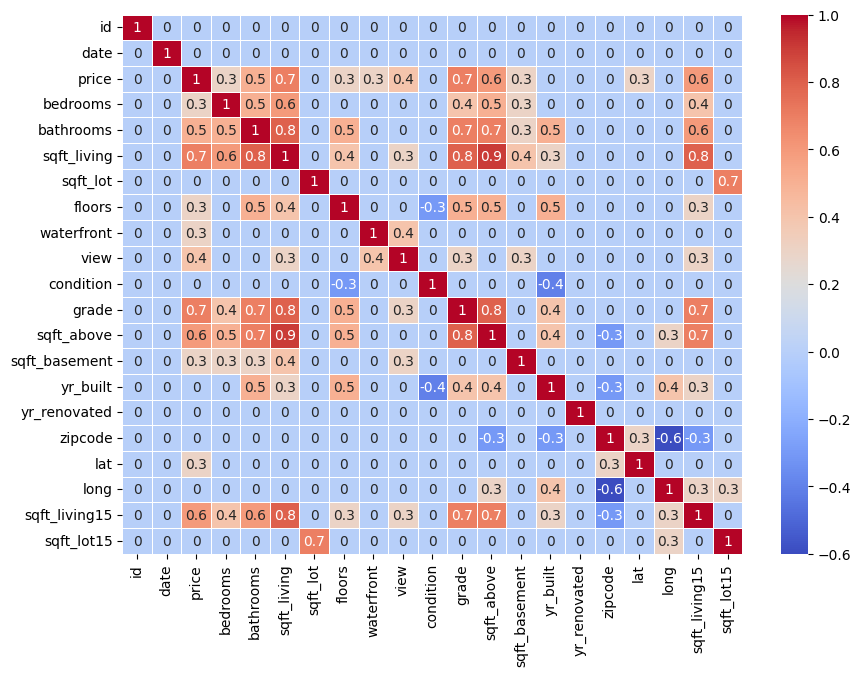

In [52]:
import numpy as np

for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_datetime(df[column]).apply(lambda x: x.toordinal())
        except ValueError:
            df = df.drop(column, axis=1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');


#### Вывод:
```
Исходя из матрицы корреляции можно сделать следующие выводы.
На стоимость недвижимости в большей степени влияют следующие параметры: жилая площадь, количество ванных комнат, вид на набережную, оценка качества, площадь над уровнем земли.
Совсем никакого влияния на стоимость неджвижимости не оказывают такие параметры, как: площадь участка, состояние дома, год постройки дома, год реновации, почтовый индекс и долгота.
```

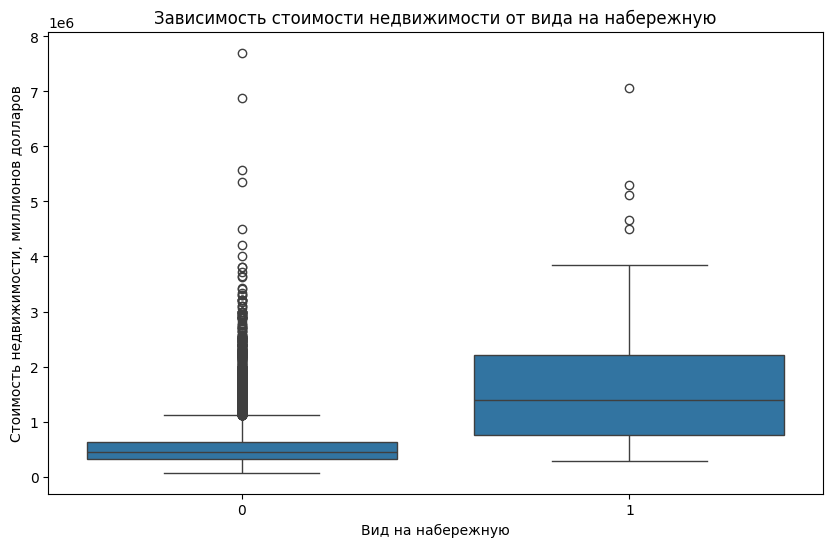

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df, whis=1.5)
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость недвижимости, миллионов долларов')
plt.title('Зависимость стоимости недвижимости от вида на набережную');

#### Вывод:
```
Самые дорогие дома - это те, которые имеют вид на набережную. Их стоимость свыше 1 млн. рублей. Дома, которые вида на набереждную не имеют, стоят до 800 тыс.рублей.
```

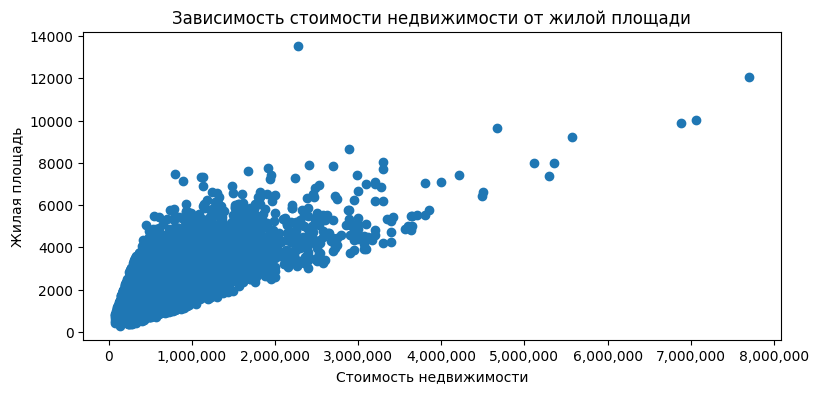

In [54]:
plt.figure(figsize=(9, 4))

plt.scatter(df['price'], df['sqft_living'])

plt.title('Зависимость стоимости недвижимости от жилой площади')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Жилая площадь')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter);

#### Вывод:
```
Из графика зависимости стоимости недвижимости от жилой площади можно сделать вывод, что зависимость между этими параметрами линейная. Т.е. чем больше жилая площадь, тем дороже дом.
Мы видим, что большинство домов, основная их масса, имеют стоимость до 4 млн., и жилая площадь у этих домов составляет до 8000 квадратных метров. Однако есть дома, которые можно пересчитать, т.к. они совсем единичные, которые имеют большую площадь и стоимость таких домов приближается к 8 млн. 
Интересный момент, который видно на графике, что есть один дом, который имеет самую большую площадь, но стоит немного больше 2 млн. С чем это связано из данного графика непонятно. Надо делать дополнительные анализы, скорее всего, на стоимость такого дома в большей степени влияет какой-то другой параметр.
```

<Figure size 700x500 with 0 Axes>

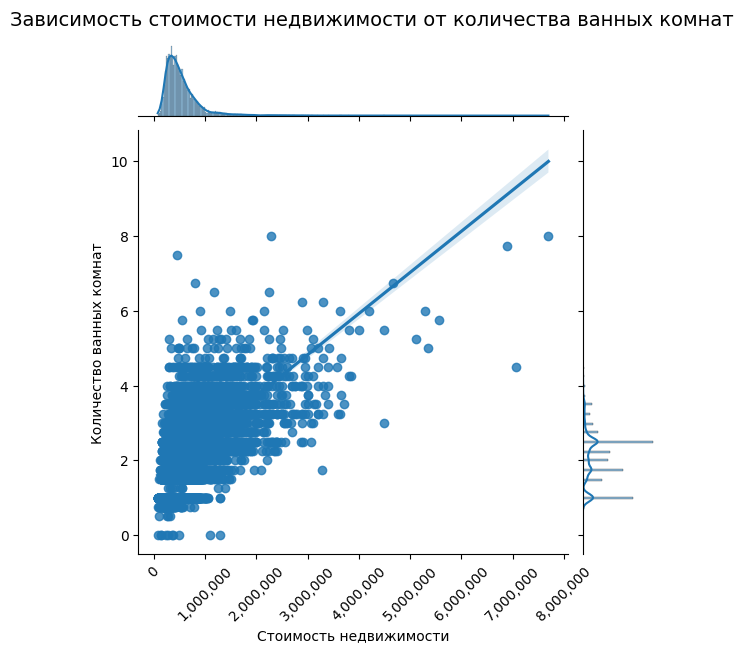

In [55]:
plt.figure(figsize=(7, 5))

joint = sns.jointplot(x='price', y='bathrooms', data=df, kind='reg')
plt.suptitle('Зависимость стоимости недвижимости от количества ванных комнат', fontsize=14, y=1.005)
plt.subplots_adjust(top=0.95)
plt.xlabel('Стоимость недвижимости')
plt.xticks(rotation=45)
plt.ylabel('Количество ванных комнат')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter);

#### Вывод:
```
Из графика зависимости стоимости недвижимости от количества ванных комнат в доме видно, что эта зависимость практически линейная. Т.е. стоимость недвижимости увеличивается с увеличением количества ванных комнат.
Однако есть и исключение, такие дома, количество вааных комнат в которых около 8 штук, а стоимость их невелика.
Большинство домов имеют до 5 ванных комнат и стоят до 3 млн. Самый дорогой дом имеет 8 ванных комнат и стоимость около 8 млн.
```

<Figure size 700x500 with 0 Axes>

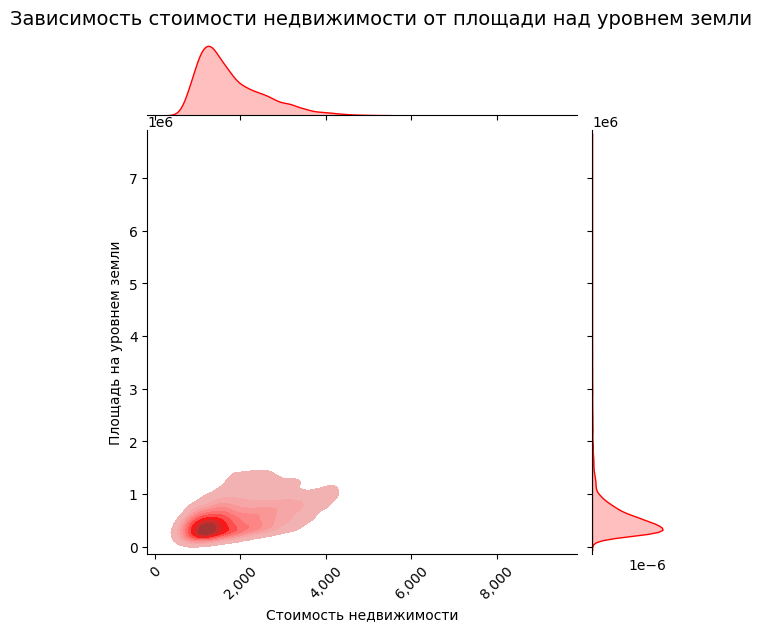

In [56]:
plt.figure(figsize=(7, 5))
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='kde', fill=True, color='red')
plt.suptitle('Зависимость стоимости недвижимости от площади над уровнем земли', fontsize=14, y=1.005)
plt.subplots_adjust(top=0.95)
plt.xlabel('Стоимость недвижимости')
plt.xticks(rotation=45)
plt.ylabel('Площадь на уровнем земли')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter);

#### Вывод:
```
Влияние площади над уровнем земли на стоимость недвижимости проявляется следующим образом: обычно более высокие этажи имеют более высокую стоимость. Это связано с различными факторами. Например, квартиры на верхних этажах могут иметь лучший вид, что повышает их стоимость. Однако это может варьироваться в зависимости от других факторов.
На графике эта взаимосвязь четко видна. Основная масса домов, стоимостью до 4 млн. имеет площадь над уровнем земли до 2 тыс. кв. футов. И видно, что чем выше дом над уровнем земли, тем дороже недвижимость.
```

<Figure size 900x600 with 0 Axes>

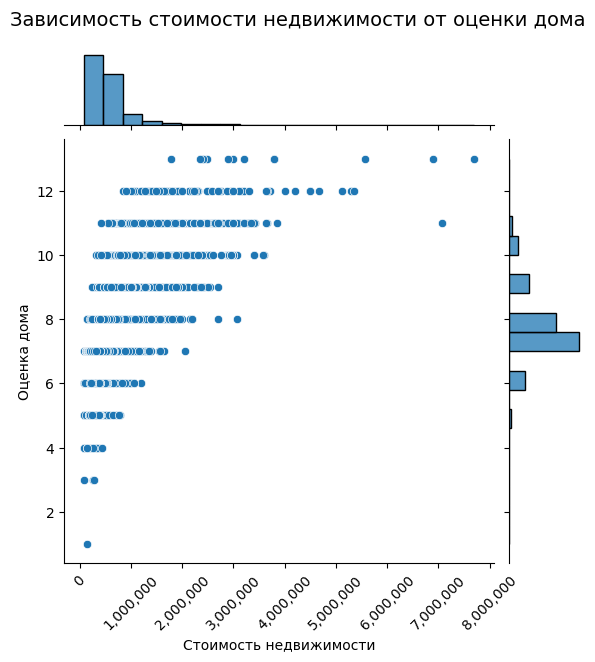

In [72]:
plt.figure(figsize=(9, 6))

g = sns.jointplot(x='price', y='grade', data=df, kind='scatter', marginal_kws=dict(bins=20, fill=True))
g.fig.suptitle('Зависимость стоимости недвижимости от оценки дома', fontsize=14, y=1.02)
plt.subplots_adjust(top=0.95)
g.set_axis_labels('Стоимость недвижимости', 'Оценка дома')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45);

#### Вывод:
```
Grade дома — это оценка, которая отражает общее качество строительства и отделки дома. Эта оценка может включать в себя множество факторов, таких как материалы, отделка, дизайн, а также уровень удобства и комфорта. 
По графику мы видим, что дома с высокой оценкой стоят дороже, так как они предлагают лучшее качество. Такие дома могут иметь более современные удобства или уникальные архитектурные особенности.
Дома с низкой оценкой стоят дешевле из-за более простых материалов, отсутствия удобств, потребности в ремонте или обновлении.
Большинство домов имеют оценку выше средней.
Стоимость домов с оценкой 12 и выше достигает до 8 млн. Но при этом есть дома с такой же высокой оценкой, но которые стоят дешевле. 

Всё это говорит о том, что на стоимость дома ни один фактор не влияет напрямую как единственный. Стоимость домов зависит сразу от нескольких факторов, поэтому есть дома, которые "выбиваются" из общего графика.
```